# 微积分

如果$f$的*导数*存在，这个极限被定义为
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
定义$u=f(x)=3x^2-4x$

In [5]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l # TODO 看源码


def f(x):
    return 3 * x ** 2 - 4 * x

通过令$x=1$并让$h$接近$0$，
$\frac{f(x+h)-f(x)}{h}$的数值结果接近$2$

In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


为了对导数的这种解释进行可视化，我们将使用`matplotlib`
定义几个函数

In [10]:
def use_svg_display():  
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca() # TODO 

    def has_one_axis(X): # 判断输入是一维的
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla() # TODO 
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$
数值模拟梯度，都是在一个特定的点上

[ 0.   -0.37 -0.68 -0.93 -1.12 -1.25 -1.32 -1.33 -1.28 -1.17 -1.   -0.77
 -0.48 -0.13  0.28  0.75  1.28  1.87  2.52  3.23  4.    4.83  5.72  6.67
  7.68  8.75  9.88 11.07 12.32 13.63]
[-3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4
 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4
  2.6  2.8]


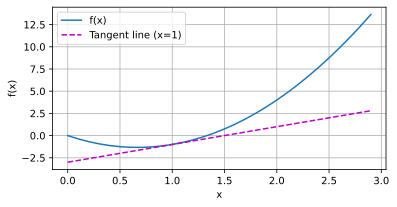

In [14]:
x = np.arange(0, 3, 0.1)
# plot(x)
print(f(x))
print(2 * x - 3)

# 同一组x坐标，对应到两种y坐标上
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'], figsize=(6,3))